# Import 

In [1]:
import pandas as pd
import tensorflow
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, TimeDistributed, Dense,Dropout,Activation,Conv2D,Reshape
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.utils import *
import math
import time
import matplotlib.pyplot as plt

/home/ubuntu/.local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Read Date

In [2]:
df = pd.read_csv('data/2377.csv' , encoding='big5')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 22 columns):
時間             841 non-null object
Open           841 non-null float64
High           841 non-null float64
Low            841 non-null float64
Close          841 non-null float64
SMA5           841 non-null float64
SMA10          841 non-null float64
SMA20          841 non-null float64
SMA60          841 non-null float64
Vol            841 non-null int64
MA5            841 non-null int64
MA10           841 non-null int64
DIF            841 non-null float64
MACD9          841 non-null float64
OSC            841 non-null float64
K              841 non-null object
D              841 non-null object
RSIx6          841 non-null object
RSIx12         841 non-null object
BBand width    841 non-null object
Band%EMA3      841 non-null object
TaiwanAll      841 non-null float64
dtypes: float64(12), int64(3), object(7)
memory usage: 144.6+ KB


In [4]:
df['K'] = df['K'].str.replace('%','').astype('float')
df['D'] = df['D'].str.replace('%','').astype('float')
    

In [5]:
# plt.figure(figsize = (15,5))
# plt.plot(df2.Close.values , color='red' , label='Close')
# plt.plot(df2.MACD9.values , color='blue' , label='MACD9')
# plt.plot(df2.SMA5.values , color='green' , label= 'SMA5')
# plt.plot(df2.SMA10.values , color='black' , label='SMA10')
# plt.plot(df2.K.values , color='yellow' , label='K')
# plt.plot(df2.D.values , color='grey' , label='D')

# plt.title('2330')
# plt.xlabel('Days')
# plt.ylabel('price')
# plt.legend(loc='best')
# plt.show()

No handles with labels found to put in legend.


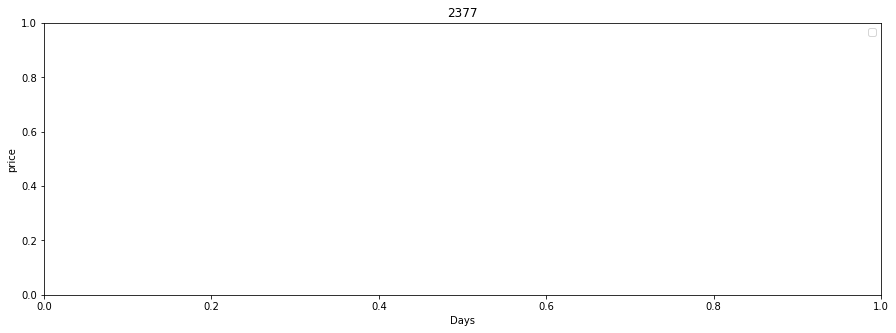

In [6]:
plt.figure(figsize = (15,5))


plt.title('2377')
plt.xlabel('Days')
plt.ylabel('price')
plt.legend(loc='best')
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 22 columns):
時間             841 non-null object
Open           841 non-null float64
High           841 non-null float64
Low            841 non-null float64
Close          841 non-null float64
SMA5           841 non-null float64
SMA10          841 non-null float64
SMA20          841 non-null float64
SMA60          841 non-null float64
Vol            841 non-null int64
MA5            841 non-null int64
MA10           841 non-null int64
DIF            841 non-null float64
MACD9          841 non-null float64
OSC            841 non-null float64
K              841 non-null float64
D              841 non-null float64
RSIx6          841 non-null object
RSIx12         841 non-null object
BBand width    841 non-null object
Band%EMA3      841 non-null object
TaiwanAll      841 non-null float64
dtypes: float64(14), int64(3), object(5)
memory usage: 144.6+ KB


In [8]:
df = pd.read_csv('data/2377.csv' , encoding='big5')

In [9]:
df.tail(10)

,時間,Open,High,Low,Close,SMA5,SMA10,SMA20,SMA60,Vol,...,DIF,MACD9,OSC,K,D,RSIx6,RSIx12,BBand width,Band%EMA3,TaiwanAll
831,2018/3/31,96.2,96.5,95.0,95.2,96.96,94.85,92.30,89.85,2622,...,2.18,1.66,0.52,61.98%,66.21%,53.17%,56.26%,14.99%,15.20%,10919.49
832,2018/4/2,96.4,104.5,96.2,101.5,97.56,96.10,93.01,90.28,31485,...,2.52,1.83,0.69,67.85%,66.76%,73.20%,66.68%,16.31%,15.75%,10888.27
833,2018/4/3,101.0,102.0,99.5,101.5,98.30,96.97,93.54,90.70,9418,...,2.78,2.02,0.76,71.76%,68.43%,73.20%,66.68%,17.88%,16.82%,10821.53
834,2018/4/9,103.0,103.0,98.4,99.3,98.62,97.45,94.00,91.02,14778,...,2.86,2.19,0.67,69.22%,68.69%,60.24%,60.67%,18.22%,17.52%,10893.53
835,2018/4/10,100.0,102.0,98.2,98.6,99.22,98.30,94.43,91.25,10458,...,2.84,2.32,0.52,59.41%,65.60%,56.43%,58.83%,18.20%,17.86%,10927.18
836,2018/4/11,101.0,102.5,98.5,100.5,100.28,98.62,94.95,91.49,9917,...,2.88,2.43,0.45,59.34%,63.51%,63.88%,62.22%,18.39%,18.12%,10974.02
837,2018/4/12,101.5,102.0,99.6,100.5,100.08,98.82,95.51,91.68,3919,...,2.89,2.52,0.37,59.29%,62.10%,63.88%,62.22%,18.10%,18.11%,10955.29
838,2018/4/13,102.0,104.0,100.5,100.5,99.88,99.09,96.09,91.88,6485,...,2.92,2.60,0.32,59.25%,61.15%,63.88%,62.22%,17.40%,17.76%,10965.39
839,2018/4/16,101.5,101.5,95.6,95.8,99.18,98.90,96.34,92.01,8117,...,2.58,2.60,-0.02,42.31%,54.87%,36.91%,49.20%,16.62%,17.19%,10954.55
840,2018/4/17,95.8,96.0,90.9,95.0,98.46,98.84,96.56,92.17,10014,...,2.05,2.49,-0.44,38.25%,49.33%,33.98%,47.36%,15.69%,16.44%,10810.45


In [25]:
def batch_data( time_steps,sd,batch_size,feature_list):

    df = pd.read_csv('data/2377.csv' , encoding='big5')
#     print(df.shape)
#     df=df[:-7]
#     print(df.shape)
    df['RSI6'] = df['RSIx6'].str.replace('%','').astype('float') 
    df['RSI6'] = df['RSI6'] * 0.01
    df['RSI12'] = df['RSIx12'].str.replace('%','').astype('float') 
    df['RSI12'] = df['RSI12'] * 0.01
    
    
#     del df['Date']
#     del df['DIF']
#     del df['K']
#     del df['D']
#     del df['MACD9']
#     del df['OSC']
#     del df['SMA60']
#     del df['MA10']
#     del df['MA5']
#     del df['SMA20']
#     del df['SMA10']

    #_data = df.drop(['Date'],['DIF'],['K'],['D'],['MACD9'],['OSC'], axis=1)
    #df.drop(['Date'],axis=1)
    # df.drop(['DIF'],axis=1)
    # df.drop(['K'],axis=1)
    # df.drop(['D'],axis=1)
    # df.drop(['MACD9'],axis=1)
    # df.drop(['OSC'],axis=1)
    df['K'] = df['K'].str.replace('%','').astype('float')
    df['K'] = df['K'] * 0.01
    
    df['D'] = df['D'].str.replace('%','').astype('float')
    df['D'] = df['D'] * 0.01

    df['Vol']= df['Vol'].astype('float')
    df['Open'] = df['Open'].astype('float')
    df['High'] = df['High'].astype('float')
    df['Low'] = df['Low'].astype('float')
    df['Close'] = df['Close'].astype('float')
    df['SMA5'] = df['SMA5'].astype('float')
    df['SMA10'] = df['SMA10'].astype('float')
    df['SMA20'] = df['SMA20'].astype('float')
    df['SMA60'] = df['SMA60'].astype('float')
    df['MA5'] = df['MA5'].astype('float')
    df['MA10'] = df['MA10'].astype('float')
    
    
#     sd = -1
    close = df['Close']
    s = 0.07
    
    df['three']=((close.shift(-3)-close)/close>s).astype('int')
    df['four']=((close.shift(-4)-close)/close>s).astype('int')
    df['five']=((close.shift(-5)-close)/close>s).astype('int')
    df['six']=((close.shift(-6)-close)/close>s).astype('int')
    df['seven']=((close.shift(-7)-close)/close>s).astype('int')
    df['eight']=((close.shift(-8)-close)/close>s).astype('int')
    df['nine']=((close.shift(-9)-close)/close>s).astype('int')
    df['ten']=((close.shift(-10)-close)/close>s).astype('int')
    df['eleven']=((close.shift(-11)-close)/close>s).astype('int')
    
    df['label'] = df['three']+df['four']+df['five']+df['six']+df['seven']+df['eight']+df['nine']+df['ten']+df['eleven']
    df['label'] = (df['label']>0).astype('int')

    Y =df['label']
    Y = np_utils.to_categorical(Y)
    #first time train
    #X = df[['Vol','Open','High','Low','Close']]
    # acc 65
    
    #second
    #X = df[['Vol','Open','High','Low','Close','MA5']]
    
    #third
    #X = df[['Vol','Open','High','Low','Close','MA5','MA10']]
    
    #4
    X = df[feature_list]
    #X = df[['Vol','Open','High','Low','Close','MA5','MA10','SMA5','SMA10','SMA20']]
    

    Y = np.array(Y)
    X = np.array(X)
    
    m = MinMaxScaler(feature_range=(0,1))
    X=m.fit_transform(X)

    X_t = []
    Y_t = []
    
    
    
    
    for i in range(0, X.shape[0] - time_steps):
        

        X_t.append(X[i:i+time_steps])
        Y_t.append(Y[i+time_steps])
    X_t = np.array(X_t)
    Y_t = np.array(Y_t)
    
    dn = X_t.shape[0]%batch_size
    X_t = X_t[dn:]
    Y_t = Y_t[dn:]
    
    
      
#     X_t,Y_t=shuffle(X_t, Y_t, random_state=0)
    
    X_t_batch_train=X_t[:-batch_size]
    Y_t_batch_train=Y_t[:-batch_size]

    X_t_batch_test=X_t[-batch_size:]
    Y_t_batch_test=Y_t[-batch_size:]
    return X_t_batch_train,Y_t_batch_train,X_t_batch_test,Y_t_batch_test,df
    
    

In [26]:
df.head()

,時間,Open,High,Low,Close,SMA5,SMA10,SMA20,SMA60,Vol,...,three,four,five,six,seven,eight,nine,ten,eleven,label
0,2014/11/7,38.20,38.85,37.90,38.80,38.57,37.58,37.10,39.34,4445.0,...,0,0,0,0,0,0,0,0,0,0
1,2014/11/10,39.15,39.45,38.65,38.65,38.50,37.89,37.25,39.29,3664.0,...,0,0,0,0,0,0,0,0,0,0
2,2014/11/11,38.65,39.00,38.40,38.70,38.44,38.15,37.34,39.24,2320.0,...,0,0,0,0,0,0,0,0,0,0
3,2014/11/12,38.60,38.80,37.65,37.70,38.33,38.19,37.41,39.16,4939.0,...,0,0,0,0,0,0,0,0,0,0
4,2014/11/13,37.00,37.40,35.65,36.30,38.03,38.14,37.42,39.04,11496.0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df.shape

(841, 34)

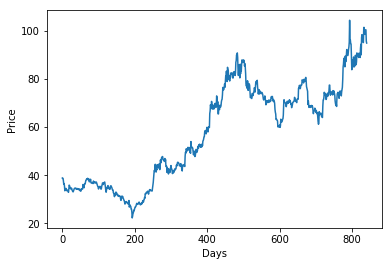

In [28]:
#dates = pd.to_datetime(df['Date'] , format='%Y%m%d')
plt.plot(df['Close'])
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

In [29]:
batch_size= 128
LR= 0.005
epoch= 1000
input_size= 6
time_steps= 6
sd = -3

In [30]:
# feature_list_try = ['SMA5', 'SMA10', 'SMA20',
#        'SMA60', 'MA5', 'MA10', 'DIF', 'MACD9', 'OSC', 'K', 'D','S_P500','SOXX','ADR']
# feature_list_try = ['S_P500','SOXX','ADR','RSI6','RSI12']
# feature_list_try = ['RSI6','TaiwanAll','RSI12','SMA5','MA5']
feature_list_try = ['TaiwanAll','RSI6','RSI12','SMA5','MA5']

new feature:  TaiwanAll


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=(128, 6, 6..., return_sequences=True, stateful=False, units=256)`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=False, stateful=False, units=128)`


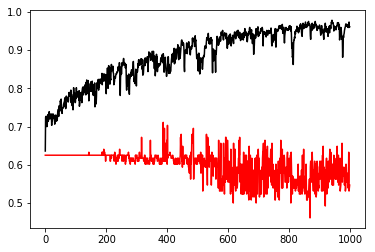

640/640 [==============================] - 0s 41us/step
train_score: [0.07135998394805938, 0.9734375]
128/128 [==============================] - 0s 45us/step
test_score: [5.237877368927002, 0.546875]
new feature:  RSI6


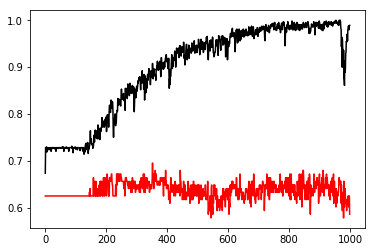

640/640 [==============================] - 0s 41us/step
train_score: [0.02647258722281549, 0.990625]
128/128 [==============================] - 0s 54us/step
test_score: [4.272182464599609, 0.5859375]
new feature:  RSI12


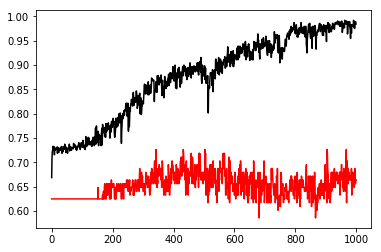

640/640 [==============================] - 0s 45us/step
train_score: [0.022951476246817037, 0.9875]
128/128 [==============================] - 0s 31us/step
test_score: [4.2362470626831055, 0.6640625]
new feature:  SMA5


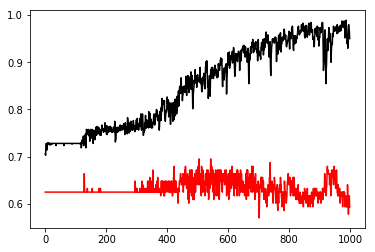

640/640 [==============================] - 0s 44us/step
train_score: [0.057018029130995275, 0.98125]
128/128 [==============================] - 0s 31us/step
test_score: [3.181230068206787, 0.59375]
new feature:  MA5


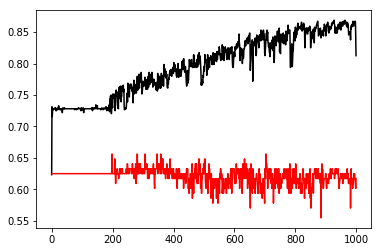

640/640 [==============================] - 0s 46us/step
train_score: [0.42018293142318724, 0.8125]
128/128 [==============================] - 0s 39us/step
test_score: [4.416766166687012, 0.6171875]


In [31]:

for i in range(len(feature_list_try)):
    feature_list = ['Open', 'High', 'Low', 'Close','Vol']
    feature_list.append(feature_list_try[i])
    input_size = len(feature_list)
    print('new feature: ',feature_list_try[i])
    model =Sequential()
    model.add(LSTM(
                batch_input_shape=(batch_size,time_steps,input_size),
                output_dim=256,
                return_sequences=True,
                stateful=False,
            ))
    model.add(Dropout(0.6))
    model.add(LSTM(
            output_dim=128,
                return_sequences=False,
                stateful=False,
             ))
    model.add(Dropout(0.6))
    model.add(Dense(256))
    model.add(Dropout(0.4))
    model.add(Dense(128))
    model.add(Dropout(0.4))
    model.add(Dense(64))
    model.add(Dropout(0.4))
    model.add(Dense(2,activation='softmax'))
    adam = Adam(LR)
    #     model.summary()
    model.compile(optimizer=adam,
                      loss='categorical_crossentropy',metrics=['accuracy'])
    X_t_batch_train,Y_t_batch_train,X_t_batch_test,Y_t_batch_test,df=batch_data(time_steps,-sd,batch_size,feature_list)
    train_history=model.fit(X_t_batch_train, Y_t_batch_train, epochs=epoch, batch_size=batch_size,verbose=0,validation_data=(X_t_batch_test,Y_t_batch_test),shuffle=True)
    plt.plot(train_history.history['acc'],color='black')
    plt.plot(train_history.history['val_acc'],color='red')
    plt.show()

    score = model.evaluate(X_t_batch_train,Y_t_batch_train, verbose=1,batch_size=128)
    print('train_score:', score)
    score = model.evaluate(X_t_batch_test,Y_t_batch_test, verbose=1,batch_size=128)
    print('test_score:', score)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 34 columns):
時間             841 non-null object
Open           841 non-null float64
High           841 non-null float64
Low            841 non-null float64
Close          841 non-null float64
SMA5           841 non-null float64
SMA10          841 non-null float64
SMA20          841 non-null float64
SMA60          841 non-null float64
Vol            841 non-null float64
MA5            841 non-null float64
MA10           841 non-null float64
DIF            841 non-null float64
MACD9          841 non-null float64
OSC            841 non-null float64
K              841 non-null float64
D              841 non-null float64
RSIx6          841 non-null object
RSIx12         841 non-null object
BBand width    841 non-null object
Band%EMA3      841 non-null object
TaiwanAll      841 non-null float64
RSI6           841 non-null float64
RSI12          841 non-null float64
three          841 non-null int64
fo

In [34]:
df.tail

<bound method NDFrame.tail of              時間    Open    High     Low   Close    SMA5  SMA10  SMA20  SMA60  \
0     2014/11/7   38.20   38.85   37.90   38.80   38.57  37.58  37.10  39.34   
1    2014/11/10   39.15   39.45   38.65   38.65   38.50  37.89  37.25  39.29   
2    2014/11/11   38.65   39.00   38.40   38.70   38.44  38.15  37.34  39.24   
3    2014/11/12   38.60   38.80   37.65   37.70   38.33  38.19  37.41  39.16   
4    2014/11/13   37.00   37.40   35.65   36.30   38.03  38.14  37.42  39.04   
5    2014/11/14   36.30   36.70   35.80   36.50   37.57  38.07  37.40  38.94   
6    2014/11/17   36.50   36.50   35.50   35.50   36.94  37.72  37.30  38.86   
7    2014/11/18   35.50   35.75   33.20   33.50   35.90  37.17  37.14  38.73   
8    2014/11/19   33.50   34.50   33.50   33.95   35.15  36.74  36.98  38.60   
9    2014/11/20   34.05   34.45   34.00   34.00   34.69  36.36  36.84  38.46   
10   2014/11/21   34.10   34.80   34.10   34.50   34.29  35.93  36.75  38.34   
11   2014/

In [35]:
df = pd.read_csv('data/2377.csv' , encoding='big5')
df_val = df[-batch_size:]

In [36]:
predictions = Y_t_batch_test[:,1]

In [37]:
df_val.iloc[0]

時間             2017/10/3
Open                66.3
High                66.6
Low                 65.2
Close               65.8
SMA5               65.76
SMA10              64.42
SMA20              65.53
SMA60              71.38
Vol                 3182
MA5                 5660
MA10                4565
DIF                -1.21
MACD9              -1.62
OSC                 0.41
K                 65.38%
D                 52.74%
RSIx6             56.70%
RSIx12            48.50%
BBand width       10.90%
Band%EMA3         11.01%
TaiwanAll        10469.4
Name: 713, dtype: object

In [46]:
holding = 0

trade_record=[]
profit=[]
for i in range(len(predictions)):
    prediction = predictions[i]
    price = float(df_val.iloc[i]['Close'])
    K = float(df_val.iloc[i]['K'].replace('%',''))
    D = float(df_val.iloc[i]['D'].replace('%',''))
    RSI = float(df_val.iloc[i]['RSIx6'].replace('%',''))
    
    if holding == 0:
        if prediction ==1 or (K<30 and D<30) or (RSI < 40) :
            print('----')
            print(K,D)
            
            

            p_d = [price,i,'BUY']
            trade_record.append(p_d)
            holding=1
            continue
    if holding ==1:
        last_trade = trade_record[-1]
        if last_trade[2]=='BUY':
            buy_price=last_trade[0]
            buy_i = last_trade[1]
            if (price/buy_price-1)>0.07 or i-buy_i>=14 or ((RSI > 75) and (K>70 and D>70)) :
                print('++++++')
                print(K,D)
#                 print((buy_i-i))eleven
                p_d_s=[price,i,'SELL']
                trade_record.append(p_d_s)
                holding=0
                profit.append(price-buy_price)

----
65.38 52.74
++++++
66.37 56.84
----
61.95 72.84
++++++
71.19 64.43
----
22.05 28.41
++++++
70.56 68.77
----
67.97 68.5
++++++
78.92 70.9
----
82.61 74.81
++++++
86.81 78.81
----
80.89 82.8
++++++
77.62 79.26
----
69.11 75.87
++++++
81.3 70.88
----
38.41 52.57
++++++
37.35 39.69
----
54.31 50.41
++++++
67.66 57.6
----
42.31 54.87


In [47]:
sum(profit)

53.89999999999998

In [48]:
trade_record

[[65.8, 0, 'BUY'],
 [71.3, 7, 'SELL'],
 [71.5, 15, 'BUY'],
 [77.5, 24, 'SELL'],
 [70.9, 40, 'BUY'],
 [74.3, 54, 'SELL'],
 [74.7, 55, 'BUY'],
 [85.0, 62, 'SELL'],
 [86.2, 63, 'BUY'],
 [88.6, 64, 'SELL'],
 [85.1, 67, 'BUY'],
 [92.3, 72, 'SELL'],
 [89.9, 73, 'BUY'],
 [104.5, 80, 'SELL'],
 [89.9, 85, 'BUY'],
 [87.2, 99, 'SELL'],
 [90.1, 102, 'BUY'],
 [97.3, 113, 'SELL'],
 [95.8, 126, 'BUY']]

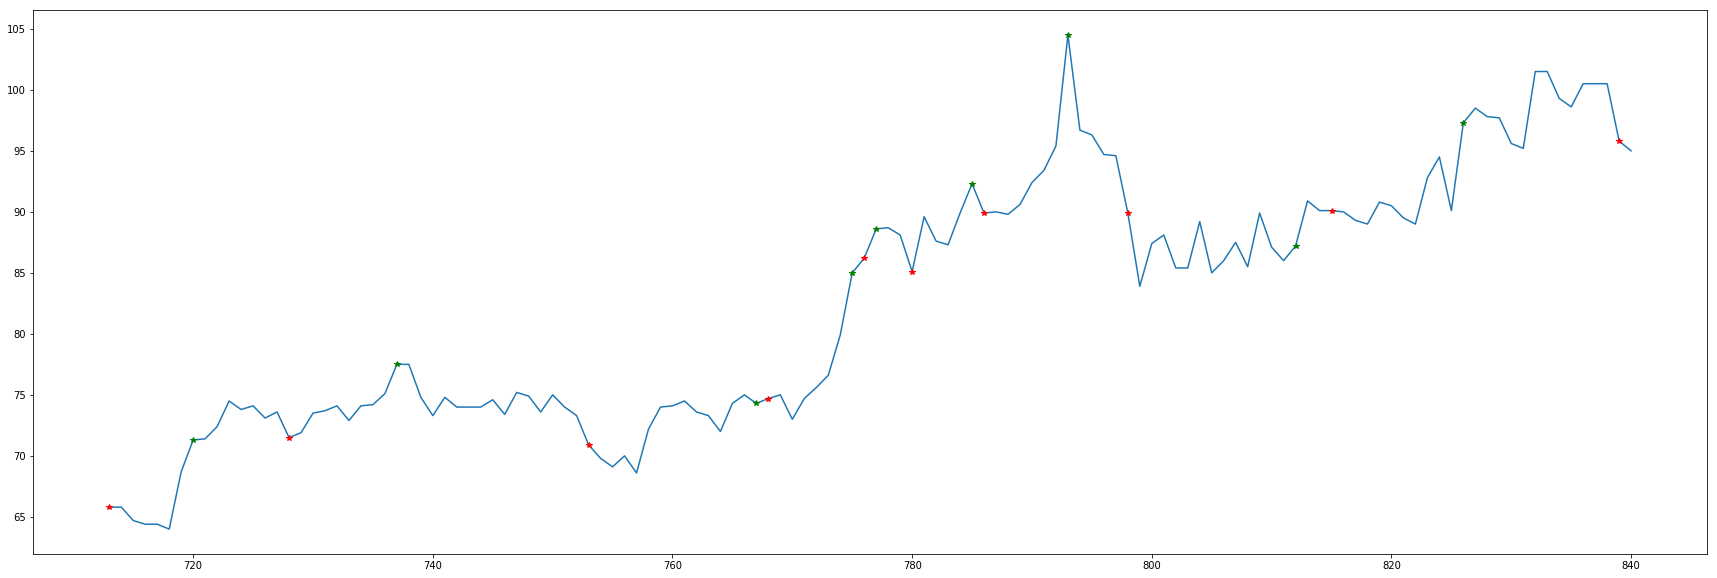

In [49]:
start = df_val['Close'].index[0]
plt.figure(figsize = (30,10))
plt.plot(df_val['Close'])
for i in trade_record:
    x=i[1]+start
    y = i[0]
    action = i[2]
    if action=='BUY':
        plt.plot(x,y,color='red',marker='*')
    else:
        plt.plot(x,y,color='green',marker='*')